In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd



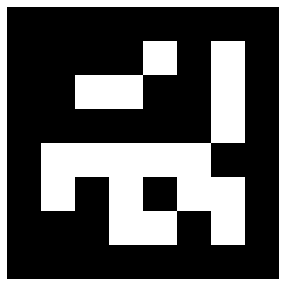

In [2]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

nx = 1
ny = 1
fig = plt.figure(figsize=(nx*5, ny*5))
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,2, 1000)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("data/markers_2.pdf")
plt.show()

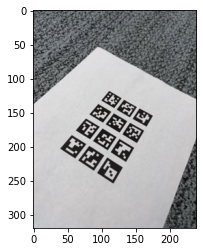

In [3]:
frame = cv2.imread("data/markers_photo.jpeg")
plt.figure()
plt.imshow(frame)
plt.show()

In [4]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners)

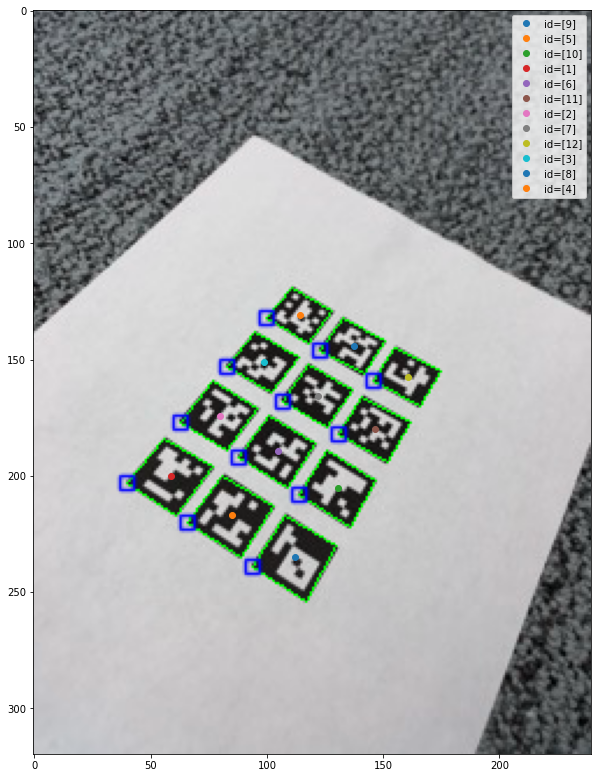

In [5]:
plt.figure(figsize=(10,15))
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

corners[i]: [[[ 94. 239.]
  [108. 217.]
  [130. 230.]
  [117. 254.]]]
rvec: [[[ 2.71158118 -1.52570785 -0.10425051]]], tvec: [[[-0.07780524 -0.00479412  0.22714644]]]
corners[i]: [[[ 66. 220.]
  [ 81. 200.]
  [103. 213.]
  [ 89. 235.]]]
rvec: [[[ 2.81095539 -1.53878822  0.33754218]]], tvec: [[[-0.09387237 -0.01225492  0.24239283]]]
corners[i]: [[[114. 208.]
  [126. 189.]
  [147. 202.]
  [136. 222.]]]
rvec: [[[ 2.65319983 -1.58581672  1.05014813]]], tvec: [[[-0.07780915 -0.01740738  0.24932488]]]
corners[i]: [[[ 40. 203.]
  [ 56. 184.]
  [ 77. 196.]
  [ 61. 217.]]]
rvec: [[[ 2.56141504 -1.42826755  0.31978525]]], tvec: [[[-0.10391302 -0.01895262  0.24157131]]]
corners[i]: [[[ 88. 192.]
  [101. 174.]
  [121. 186.]
  [109. 205.]]]
rvec: [[[ 2.74615628 -1.57365423  0.67826369]]], tvec: [[[-0.09559537 -0.02587024  0.26959339]]]
corners[i]: [[[131. 182.]
  [141. 166.]
  [162. 177.]
  [152. 194.]]]
rvec: [[[ 2.43078972 -1.55507266  0.9700625 ]]], tvec: [[[-0.07654542 -0.02981191  0.26722497]]

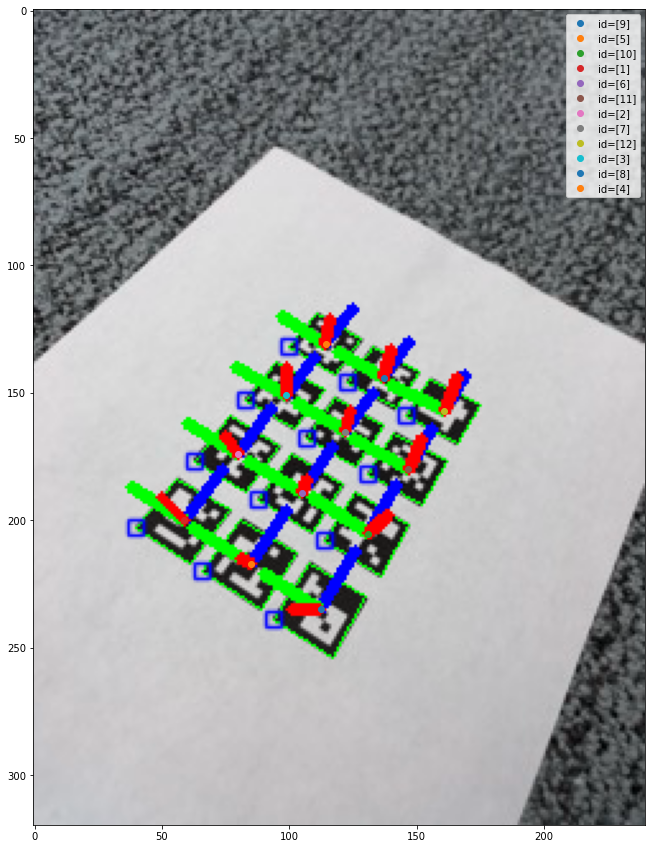

In [7]:

camera_intrinsics = np.array([[612.82019043,   0.        , 322.14050293],
                              [  0.        , 611.48303223, 247.9083252 ],
                              [  0.        ,   0.        ,   1.        ]])
distortion_coefficients = np.zeros((5))
for i in range(len(corners)):
    print('corners[i]: {}'.format(corners[i]))
    rvec, tvec, markerPoints = aruco.estimatePoseSingleMarkers(corners[i], 0.01,
                                                               camera_intrinsics,
                                                               np.zeros(5))
    print('rvec: {}, tvec: {}'.format(rvec, tvec)) # This gives exactly the position and rotation of all the markers
    if i == 0:
        frame_axis = aruco.drawAxis(frame_markers.copy(), camera_intrinsics, distortion_coefficients, rvec, tvec, 0.01)
    else:
        frame_axis = aruco.drawAxis(frame_axis.copy(), camera_intrinsics, distortion_coefficients, rvec, tvec, 0.01)

plt.figure(figsize=(15,15))
plt.imshow(frame_axis)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()